In [1]:
import pandas as pd
data = pd.read_csv("car_price.csv")
print(data.head())


  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


In [2]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [3]:
data = pd.get_dummies(data, columns=['Fuel_Type', 'Transmission', 'Seller_Type'], drop_first=True)
print(data.head())


  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  Owner  \
0     ritz  2014           3.35           5.59       27000      0   
1      sx4  2013           4.75           9.54       43000      0   
2     ciaz  2017           7.25           9.85        6900      0   
3  wagon r  2011           2.85           4.15        5200      0   
4    swift  2014           4.60           6.87       42450      0   

   Fuel_Type_Diesel  Fuel_Type_Petrol  Transmission_Manual  \
0             False              True                 True   
1              True             False                 True   
2             False              True                 True   
3             False              True                 True   
4              True             False                 True   

   Seller_Type_Individual  
0                   False  
1                   False  
2                   False  
3                   False  
4                   False  


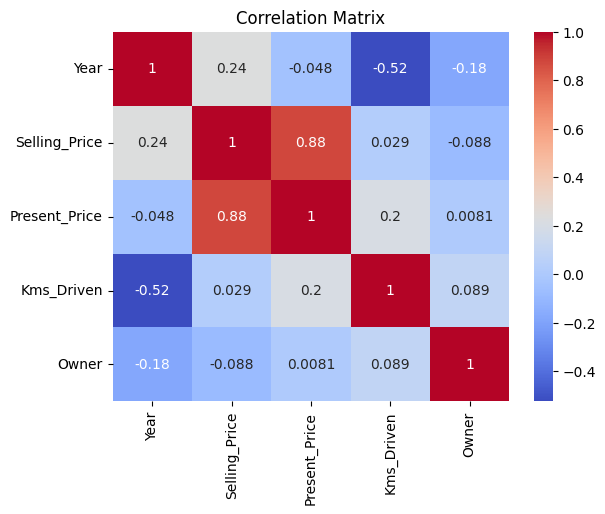

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation = numeric_data.corr()

# Plot the heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [11]:
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.5.2-cp311-cp311-win_amd64.whl.metadata (13 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
Using cached scikit_learn-1.5.2-cp311-cp311-win_amd64.whl (11.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)


In [13]:
from sklearn.model_selection import train_test_split
X = data.drop('Selling_Price', axis=1)
y = data['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)


(240, 9) (61, 9)


Mean Absolute Error: 0.588070491803279


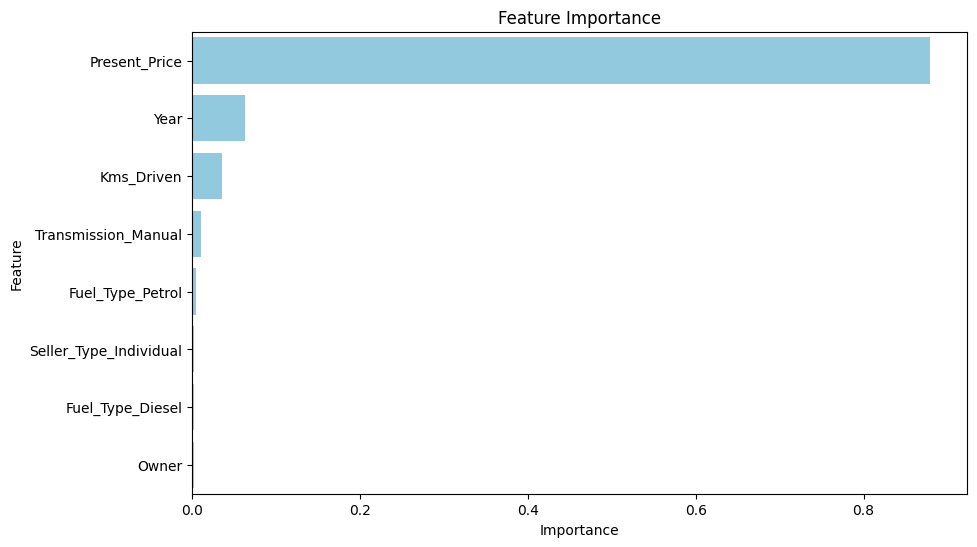

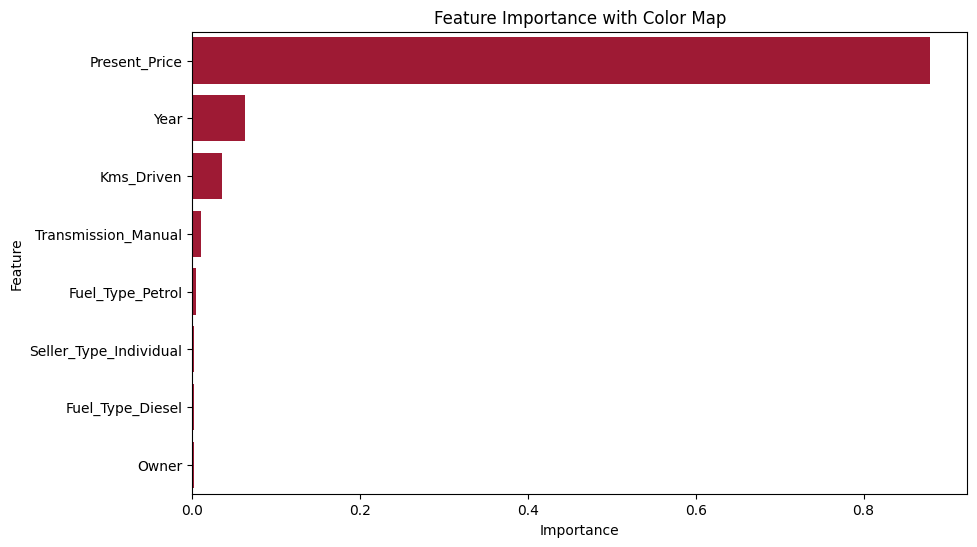

Predicted Selling Price: 8.069000000000006


In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


data = pd.read_csv("car_price.csv")

data = pd.get_dummies(data, columns=['Fuel_Type', 'Transmission', 'Seller_Type'], drop_first=True)

X = data.drop(['Selling_Price', 'Car_Name'], axis=1)
y = data['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

importances = model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, color='skyblue')
plt.title('Feature Importance')
plt.show()


cmap = plt.cm.coolwarm 


norm = plt.Normalize(vmin=importance_df['Importance'].min(), vmax=importance_df['Importance'].max())


plt.figure(figsize=(10, 6))

colors = [cmap(norm(value)) for value in importance_df['Importance']]

sns.barplot(x='Importance', y='Feature', data=importance_df, color=colors[0])  
plt.title('Feature Importance with Color Map')
plt.show()
new_car = {
    'Year': 2018,
    'Present_Price': 10.0,
    'Kms_Driven': 20000,
    'Owner': 1,
    'Fuel_Type_Diesel': 0,
    'Fuel_Type_Petrol': 1,
    'Transmission_Manual': 1,
    'Seller_Type_Individual': 1
}

new_car_df = pd.DataFrame(new_car, index=[0])

predicted_price = model.predict(new_car_df)
print(f"Predicted Selling Price: {predicted_price[0]}")
